In [9]:
using LazySets

In [10]:
import LazySets: minkowski_sum

function minkowski_sum(P::VPolygon, Q::VPolygon)
    vlP = vertices_list(P)
    vlQ = vertices_list(Q)
    sizeP = size(vlP, 1)
    sizeQ = size(vlQ, 1)
    i = 1
    k = 1
    j = 1
    R = Array{Array{Float64,1},1}(undef, sizeP+sizeQ)
    fill!(R, [0.0, 0.0])
    while i <= size(R, 1)
        OP = vlP[(k%sizeP+1)]-vlP[(k-1)%sizeP+1]
        OQ = vlQ[(j%sizeQ+1)]-vlQ[(j-1)%sizeQ+1]
        R[i] = vlP[(k-1)%sizeP+1]+vlQ[(j-1)%sizeQ+1]
        if (LazySets.right_turn(OP, OQ, [0.0, 0.0]) > 0)
            k += 1
            i += 1
        elseif (LazySets.right_turn(OP, OQ, [0.0, 0.0]) < 0)
            j += 1
            i += 1
        else
            pop!(R)
            k += 1
            j += 1
            i += 1
        end
    end
    return R
end

minkowski_sum (generic function with 2 methods)

In [11]:
A = [4.0 0.0; 6.0 2.0; 4.0 4.0]
B = [-2.0 -2.0; 2.0 0.0; 2.0 2.0; -2.0 4.0]
P = VPolygon([A[i, :] for i in 1:size(A, 1)])
Q = VPolygon([B[i, :] for i in 1:size(B, 1)])
PQ = VPolygon(minkowski_sum(P, Q))

C = [1.0 0.0; 0.0 1.0; 0.0 -1.0]
D = [0.0 0.0; 1.0 1.0; 1.0 -1.0]
R = VPolygon([C[i, :] for i in 1:size(C, 1)])
S = VPolygon([D[i, :] for i in 1:size(D, 1)])
RS = VPolygon(minkowski_sum(R, S))

E = [10.0 5.0; 10.0 10.0; 7.5 10.0; 5.0 7.5; 5.0 5.0]
F = [-1.0 -2.0; 1.0 -2.0; -1.0 2.0]
T = VPolygon([E[i, :] for i in 1:size(E, 1)])
U = VPolygon([F[i, :] for i in 1:size(F, 1)])
TU = VPolygon(minkowski_sum(T, U))

VPolygon{Float64}(Array{Float64,1}[[4.0, 3.0], [11.0, 3.0], [11.0, 8.0], [9.0, 12.0], [6.5, 12.0], [4.0, 9.5]])

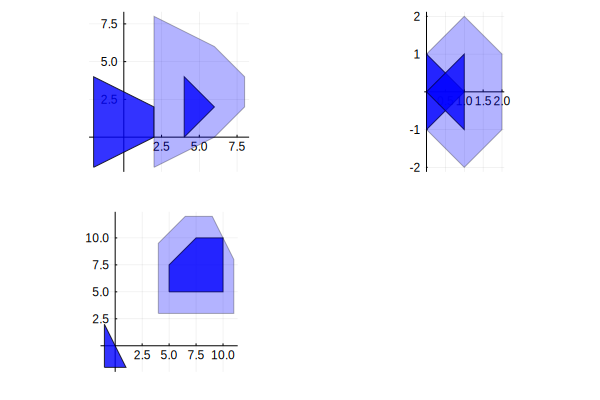

In [17]:
using Plots
plot([P, R, T], layout=3, alpha = .8, framestyle=:origin, aspect_ratio=1)
plot!([Q, S, U], alpha = .8)
plot!([PQ, RS, TU], alpha =.3)